# Pieces Detector Training ♟️
This notebook is dedicated to training a model for detecting chess pieces on the board. Each step will guide you through setting up the environment, preparing the dataset, and training the model.

### 📦 Installing Additional Dependencies
This step installs two important libraries required for the corner detection training process:
- Ultralytics: A library that supports YOLO (You Only Look Once) models for object detection.
- Roboflow: A tool for dataset management and machine learning workflow optimization.

In [ ]:
!pip install ultralytics roboflow matplotlib tqdm

### 📚 Importing Essential Libraries
This step imports the necessary libraries for downloading the dataset, training the YOLO model, and organizing the outputs.

In [101]:
from roboflow import Roboflow
from ultralytics import YOLO
from glob import glob
import matplotlib.pyplot as plt

### 📂 Downloading the Dataset Using Roboflow
In this step, we are using the Roboflow API to download the dataset for chessboard pieces detection.

In [ ]:
rf = Roboflow(api_key="CWXP8SPXMclAxwcftpbL")
project = rf.workspace("michael-th53m").project("chess-llr39")
version = project.version(1)
dataset = version.download("yolov11")                

### 🖼️ Loading Dataset Images
In this step, we load the image paths for the training, validation, and testing datasets.

In [109]:
train_images = glob("Chess-1/train/images/*.jpg")
valid_images = glob("Chess-1/valid/images/*.jpg")
test_images = glob("Chess-1/test/images/*.jpg")

### 🔢 Calculating Dataset Counts and Percentages
Here, we calculate the count of images in each dataset and their percentage of the total dataset.

In [110]:
train_count = len(train_images)
valid_count = len(valid_images)
test_count = len(test_images)
total_count = train_count + valid_count + test_count

train_percentage = (train_count / total_count) * 100 if total_count > 0 else 0
valid_percentage = (valid_count / total_count) * 100 if total_count > 0 else 0
test_percentage = (test_count / total_count) * 100 if total_count > 0 else 0

### 📋 Creating and Displaying the Dataset Summary Table
Now, we organize the counts and percentages into a formatted table for better visualization.

In [111]:
print(f"{'Dataset':<12}{'Count':<8}{'Percentage':<12}")
print("-" * 32)

print(f"{'Train':<12}{train_count:<8}{train_percentage:>11.2f}%")
print(f"{'Validation':<12}{valid_count:<8}{valid_percentage:>11.2f}%")
print(f"{'Test':<12}{test_count:<8}{test_percentage:>11.2f}%")
print(f"{'Total':<12}{total_count:<8}{100.00:>11.2f}%")

Dataset     Count   Percentage  
--------------------------------
Train       7040          70.68%
Validation  1893          19.01%
Test        1027          10.31%
Total       9960         100.00%


### 📊 Visualizing Dataset Distribution with a Pie Chart
Lets create a pie chart to visually represent the distribution of the dataset among training, validation, and testing splits.

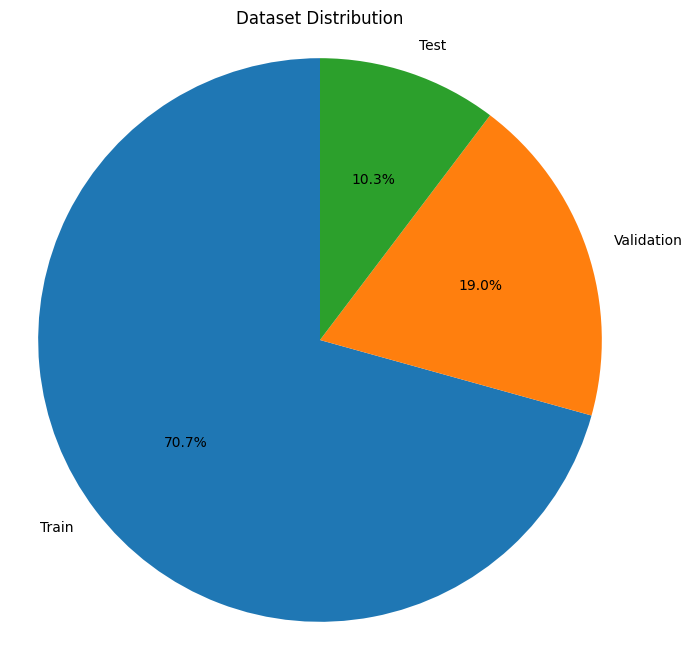

In [113]:
labels = ['Train', 'Validation', 'Test']
counts = [train_count, valid_count, test_count]
total_count = sum(counts)
sizes = [(count / total_count) * 100 for count in counts]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Dataset Distribution")
plt.axis('equal')
plt.show()

---

### 📊 Ratio Overview

The new dataset distribution is as follows:

```
Dataset     Count   Percentage  
--------------------------------
Train       7040          70.68%
Validation  1893          19.01%
Test        1027          10.31%
Total       9960         100.00%
```

This is **almost the needed ratio** of 70% training, 20% validation, and 10% testing. The dataset is ready for training! 🎉

---

### 🚀 Let's Start Training!

With the dataset ready, we can now begin the training process for the pieces detector model. 🔥


### 📥 Downloading the YOLOv11 Nano Model
To kickstart the training process, we will download the YOLOv11 Nano model. This version is lightweight and optimized for fast inference and minimal resource usage, making it an excellent choice for our corner detection task.

In [114]:
model = YOLO('yolo11n.pt')

---

### 📝 Adjusting the `data.yaml` File

Before starting the training, we need to update the `data.yaml` file. This file defines the paths to the training, validation datasets, and the class labels. Adjusting it ensures that the model trains on the correct dataset splits.

---

### 🚀 Starting the Training Process

Once the `data.yaml` file is correctly configured, we will initiate the training of the **YOLOv11 Nano** model. This will involve multiple epochs to optimize the model for corner detection.

Let’s begin! 🔥

---

In [ ]:
model.train("Chess-1/data.yaml", epochs=100)

### 🎉 Training Complete!

After the training process is finished, you can find the trained model saved under:

**`weights/best.pt`**

The model is now ready to be used. Happy Hacking! 🚀✨